In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data set
df = pd.read_csv('car_age_price.csv')
# Step 1: Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage[missing_percentage > 0])

Missing values per column:
Year     0
Price    0
dtype: int64

Columns with missing values:
Series([], dtype: int64)

Percentage of missing values per column:
Series([], dtype: float64)


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('car_age_price.csv')

# Step 1: Describe the 'Price' column to get statistics
print(df['Price'].describe())

# Step 2: Calculate IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f"\nNumber of outliers: {outliers.shape[0]}")
print("Outlier rows:")
print(outliers)

count       112.000000
mean     483866.044643
std       91217.450533
min      300000.000000
25%      423750.000000
50%      500000.000000
75%      550000.000000
max      755000.000000
Name: Price, dtype: float64

Number of outliers: 1
Outlier rows:
   Year   Price
1  2019  755000


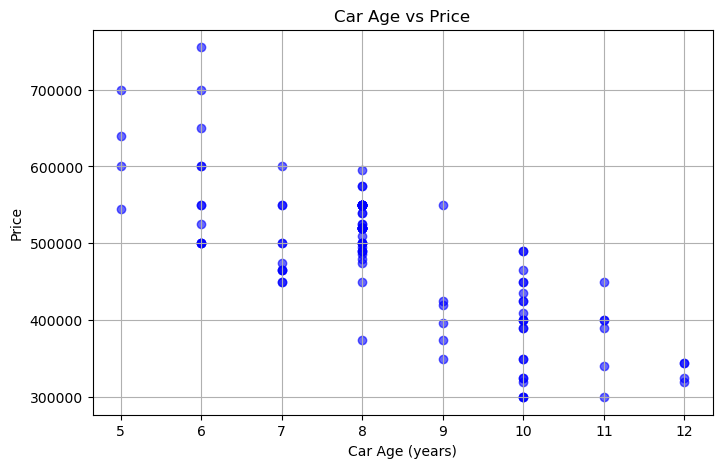

Intercept: 845848.2181735575
Coefficient (slope): -43453.37988792974
Mean Squared Error: 3276721166.563731
R² Score: 0.6026450104600366


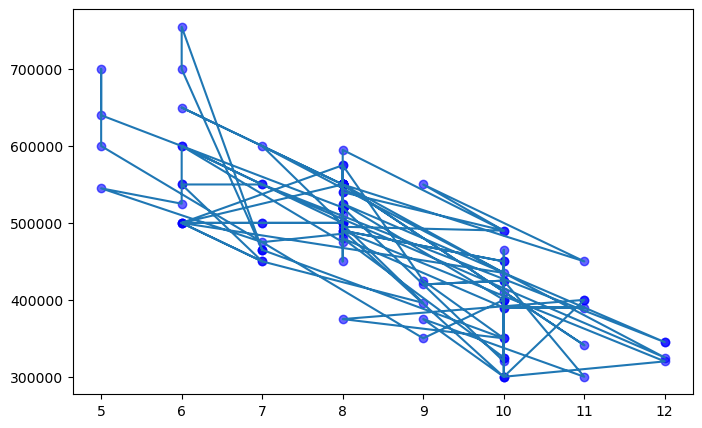

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data set
df = pd.read_csv('car_age_price.csv')

#Feature
current_year = 2025
df['Age'] = current_year - df['Year']

#2.Splitting the data
X = df[['Age']]  # Independent variable
y = df['Price']  # Dependent variable

#3.Creating and training the model
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6)
plt.title('Car Age vs Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Price')
plt.grid(True)
plt.show()
model = LinearRegression()
model.fit(X, y)

#4.Print the regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

#5.Predict prices using the model
y_pred = model.predict(X)

#6.Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
#7. Plot regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual')
plt.plot(X, y)

Lasso Regression Results:
Mean Squared Error: 4326859771.01546
R² Score: 0.36759992847787515
Coefficient (Slope): -47608.155599500424
Intercept: 886423.8410699418


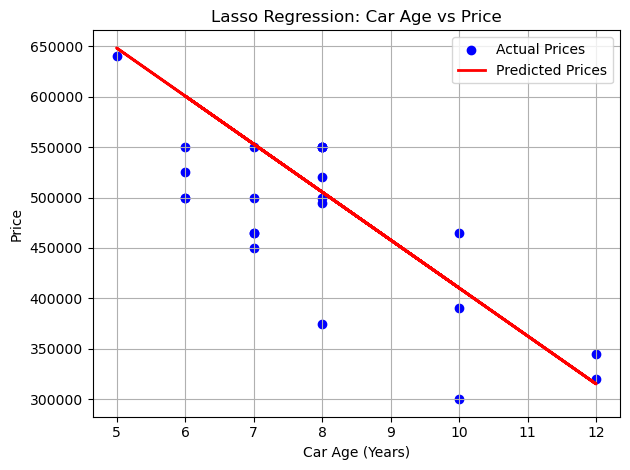

In [18]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("car_age_price.csv")  # Make sure this file is in your working directory

# Convert Year to Age (assuming current year is 2025)
df['Age'] = 2025 - df['Year']

# Define features and target
X = df[['Age']]
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso Regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Lasso Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Coefficient (Slope): {lasso.coef_[0]}")
print(f"Intercept: {lasso.intercept_}")

# Plot actual vs predicted prices
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel("Car Age (Years)")
plt.ylabel("Price")
plt.title("Lasso Regression: Car Age vs Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
